In [1]:
import os
import sys
import re
import requests
from bs4 import BeautifulSoup
import pickle
sys.path.append('../')
import confana
#from common import *

CoRL2021 ...
https://openreview.net/group?id=robot-learning.org/CoRL/2021/Conference#accept--oral-
https://openreview.net/group?id=robot-learning.org/CoRL/2021/Conference#accept--poster-
oral: 26
poster: 127
oral: 26, spotlight: 0, poster: 127
	2 Japanese authors out of all 758 authors
	2 Japanese related papers out of all 153 papers
CoRL2022 ...
https://openreview.net/group?id=robot-learning.org/CoRL/2022/Conference#accept--oral-
2  pages
##

https://openreview.net/group?id=robot-learning.org/CoRL/2022/Conference#accept--poster-
7  pages
#######

oral: 34
poster: 163
oral: 34, spotlight: 0, poster: 163
	3 Japanese authors out of all 1014 authors
	3 Japanese related papers out of all 197 papers
CoRL2023 ...
https://openreview.net/group?id=robot-learning.org/CoRL/2023/Conference#accept--oral-
2  pages
##

https://openreview.net/group?id=robot-learning.org/CoRL/2023/Conference#accept--poster-
7  pages
#######

oral: 33
poster: 166
oral: 33, spotlight: 0, poster: 166
	13 Japanese authors 

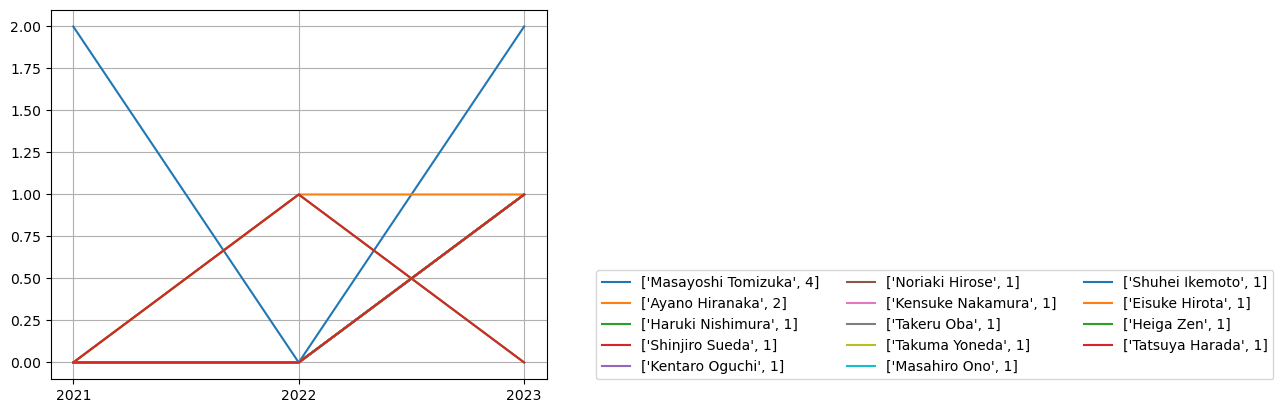

In [3]:
# configurations
#urlpre = 'https://openreview.net/group?id=ICLR.cc/'
urlpre = 'https://openreview.net/group?id=robot-learning.org/CoRL/'
urlpost = '/Conference'
since = 2021
until = 2023
#param = confana.set_param(urlpre, 'ICLR', since, until, 1, 1)
param = confana.set_param(urlpre, 'CoRL', since, until, 1, 1)

ttlist = {}
aulist = {}
numor = {}
numsl = {}
numpo = {}
numppr = {}
jpppr = {}
jptitles = {}
jpauthors = {}
hist = {}
histall = {}

for ii in range(since,until+1,1):
    yr = str(ii)
    url = urlpre+yr+urlpost
    pklfl = param.cachedir + '/' + 'summary' + yr

    if os.path.exists(pklfl):
        with open(pklfl,'rb') as f:
            authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper, numoral, numsl, numposter = pickle.load(f)
            print(r'oral: {}, spotlight: {}, poster: {}'.format(numoral, numsl, numposter))
            print(f'loading {pklfl}...')
        print(f'\t{numjpauthors} Japanese authors out of all {numallauthors} authors')
        print(f'\t{numjppaper} Japanese related papers out of all {numpapers} papers')
    else:
        conf = param.conf_prefix + yr
        print(conf,'...')
        pu = confana.parseUrl(param,yr)
        normal, authorss, titles, numoral, numsl, numposter = pu.parseOpenReview(url)
        print(r'oral: {}, spotlight: {}, poster: {}'.format(numoral, numsl, numposter))
        if normal < 0: 
            print('parsing failed...')

        pAT = confana.parseATlist(titles, authorss)
        jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pAT.selectJP()
        hist = pAT.makehist(jpauthors,yr)

        with open(pklfl, 'wb') as f:
            pickle.dump((authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper, numoral, numsl, numposter), f)

        print(f'\t{numjpauthors} Japanese authors out of all {numallauthors} authors')
        print(f'\t{numjppaper} Japanese related papers out of all {numpapers} papers')
        
    #print(jpauthors)
    #for ii in range(0,len(jpauthors)):
    #    print(f'{jpauthors[ii]}\t{jptitles[ii]}')
    pAT = confana.parseATlist(titles, authorss)
    histall = pAT.mergehist(histall,hist,yr)

ph = confana.parseHist(param,histall)
ph.plotsorted()